# Case Study: How Does a Bike-Share Navigate Speedy Success?

This case study is the capstone assignment for the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) program. Here we assume the role of data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago.

## Scenario

### About the Company

<b>Cyclistic</b> is a bike-share company that features more than 5,800 bicycles and 600 docking stations. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments by providing three different pricing plans: single-ride passes, full-day  passes, and  annual  memberships.  Customers  who  purchase  single-ride or  full-day  passes  are  referred  to  as  casual  riders. Customers who  purchase  annual  memberships  are  Cyclistic  members. 

### Analysis objective

Cyclistic’s ﬁnance analysts have concluded that annual members are much more proﬁtable than casual riders. Although the pricing ﬂexibility helps Cyclistic attract more customers, the director of marketing believes that maximizing the number of annual members will be key to future growth, thus, rather than creating a marketing campaign that targets all-new customers, they should focus on converting casual riders into members. In order to do that, first, we need to answer the question: <b>"How  do  annual members and casual riders use Cyclistic bikes?"</b>

### Data information 

We will use [Cyclistic’s historical trip data](https://divvy-tripdata.s3.amazonaws.com/index.html) to analyze and identify trends in users' behavior. The data record the details of every ride logged by the customers of Cyclistic in monthly period. We will use the data of 12 previous months from <b>July 2021 to June 2022</b>.

Due to data-privacy issues, we won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes. 

(Note: The datasets have a diﬀerent name because Cyclistic is a ﬁctional company. The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement>).)

## Prepare the data

### Import data

The 12-month historical trip data (in CSV format) are extracted and stored in one folder titled “trip_data”. We will merge the 12 CSV files into one dataframe called “df”.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import glob
from matplotlib.ticker import StrMethodFormatter

In [2]:
# list of csv files
files = glob.glob('trip_data' + "/*.csv")
print(files)

['trip_data\\202107-divvy-tripdata.csv', 'trip_data\\202108-divvy-tripdata.csv', 'trip_data\\202109-divvy-tripdata.csv', 'trip_data\\202110-divvy-tripdata.csv', 'trip_data\\202111-divvy-tripdata.csv', 'trip_data\\202112-divvy-tripdata.csv', 'trip_data\\202201-divvy-tripdata.csv', 'trip_data\\202202-divvy-tripdata.csv', 'trip_data\\202203-divvy-tripdata.csv', 'trip_data\\202204-divvy-tripdata.csv', 'trip_data\\202205-divvy-tripdata.csv', 'trip_data\\202206-divvy-tripdata.csv']


In [3]:
# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)

### Clean up & add data to prepare for analysis

Quick view the data using head() and info(). Checking if there are missing values.

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900385 entries, 0 to 5900384
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 585.2+ MB


In [6]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    836018
start_station_id      836015
end_station_name      892103
end_station_id        892103
start_lat                  0
start_lng                  0
end_lat                 5374
end_lng                 5374
member_casual              0
dtype: int64

There are missing values on station information columns. In this step, I do not use the information about location. You can find the cleaning and preparing steps for data used in Tableau dashboard [here](./B.%20clean_station_info.ipynb).

### Check the label in 'member_casual' column

Before 2020, Cyclistic used different labels for these two types of riders. This data is from 2021 but we still want to confirm that the categorical terms for casual riders (“casual”) and annual members (“members”) are still being used.

In [7]:
df['member_casual'].value_counts()

member    3342158
casual    2558227
Name: member_casual, dtype: int64

### Creating new variables

Add columns for month, day, weekday...

In [8]:
# convert started_at and ended_at to date time
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [9]:
# add date, year_month, day_of_week columns
df['date'] = df['started_at'].dt.date
df['year_month'] = df['started_at'].dt.to_period('M')
df['day_of_week'] = df['started_at'].dt.day_name()
df['day_type'] = df['day_of_week'].apply(lambda t: 'Weekend' if t in ['Saturday', 'Sunday'] else 'Weekday')
df['hour'] = df['started_at'].dt.hour
df[['date', 'year_month', 'day_of_week', 'day_type', 'hour']].head()

,date,year_month,day_of_week,day_type,hour
0,2021-07-02,2021-07,Friday,Weekday,14
1,2021-07-07,2021-07,Wednesday,Weekday,16
2,2021-07-25,2021-07,Sunday,Weekend,11
3,2021-07-08,2021-07,Thursday,Weekday,22
4,2021-07-28,2021-07,Wednesday,Weekday,16


In [10]:
# create categorical to order day of week
df['day_of_week'] = pd.Categorical(
    df['day_of_week'], 
    categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

Add a "ride_length" calculation to all trips (in minutes)

In [11]:
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df['ride_length'].head()

0    35.366667
1    18.450000
2    17.833333
3    15.033333
4    19.050000
Name: ride_length, dtype: float64

### Remove "bad" data


From the [data source page](https://ride.divvybikes.com/system-data), they claimed that:

> The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).

 However we should still check if there are any "bad" entries left.

In [12]:
# check if ride_length was less then 1 minutes
df['ride_id'][df['ride_length'] < 1].count()

99395

In [13]:
# check if trips are taken for test purpose
df[df['start_station_id'].str.contains('test', case=False, regex=False, na=False)][['start_station_id', 'start_station_name']].drop_duplicates()

,start_station_id,start_station_name
21008,Hubbard Bike-checking (LBS-WH-TEST),Base - 2132 W Hubbard Warehouse
3633414,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station
4578009,DIVVY 001 - Warehouse test station,WEST CHI-WATSON
4589923,Hubbard Bike-checking (LBS-WH-TEST),Base - 2132 W Hubbard
5201347,DIVVY 001 - Warehouse test station,WestChi


These entries are not useful for our analysis hence we will remove them. We will create a new dataframe bike_df with only valid rows and relevant columns for our analysis.


In [14]:
col = ['rideable_type','member_casual', 'date', 'year_month', 'day_of_week', 'day_type', 'hour', 'ride_length']
bike_df = df[col][(df['ride_length'] >= 1) & (df['start_lat'] < 44) 
    & (~df['start_station_id'].str.contains('test', case=False, regex=False, na=False)) 
    & (~df['end_station_id'].str.contains('test', case=False, regex=False, na=False))]
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5799562 entries, 0 to 5900384
Data columns (total 8 columns):
 #   Column         Dtype    
---  ------         -----    
 0   rideable_type  object   
 1   member_casual  object   
 2   date           object   
 3   year_month     period[M]
 4   day_of_week    category 
 5   day_type       object   
 6   hour           int64    
 7   ride_length    float64  
dtypes: category(1), float64(1), int64(1), object(4), period[M](1)
memory usage: 359.5+ MB


## Conduct descriptive analysis

### Simple statistics to understand data layout

First, let's look at the number of rides and ride duration by customer types.

In [15]:
# percentage of number of rides by customer type
bike_df['member_casual'].value_counts() / len(bike_df) * 100

member    56.571582
casual    43.428418
Name: member_casual, dtype: float64

Overall, members tend to use the services more often than casual riders. 56% of all trips were made by members, while the remaining 43% of trips were undertaken by casual riders.



In [16]:
# statistic summary on ride_length for all trips
bike_df['ride_length'].describe().round()

count    5799562.0
mean          21.0
std          150.0
min            1.0
25%            6.0
50%           11.0
75%           20.0
max        41646.0
Name: ride_length, dtype: float64

In [17]:
# statistic summary on ride_length by customer types
bike_df.groupby(['member_casual']).agg({'ride_length': ['count', 'min', 'median', 'mean', 'max']})

ride_length                                         
                    count  min     median       mean           max
member_casual                                                     
casual            2518658  1.0  15.083333  30.030546  41645.516667
member            3280904  1.0   9.233333  13.212915   1559.900000

The max value seems to indicate that there are significant outliers in the data. Let's draw boxplot to take a closer look on the duration range.

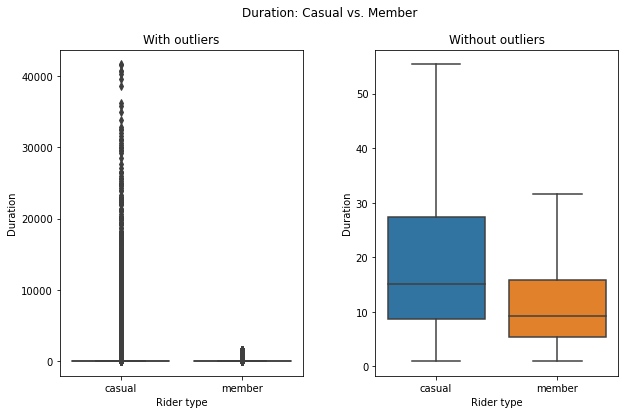

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,6))
fig.suptitle('Duration: Casual vs. Member')

sns.boxplot(ax=ax1, data=bike_df, x='member_casual', y='ride_length')
ax1. set_title('With outliers')
ax1.set(ylabel='Duration', xlabel='Rider type')

sns.boxplot(ax=ax2, data=bike_df, x='member_casual', y='ride_length', showfliers=False)
ax2. set_title('Without outliers')
ax2.set(ylabel='Duration', xlabel='Rider type')

plt.subplots_adjust(wspace=0.3)

Looking at the plot and statistic summary, one can conclude that the casual riders often took longer trips than members. Another note is that there are a remarkable number of outliers, especially in case of casuals, which can heavily skew the mean values. Hence, in this analysis, we will look at both mean and median when comparing the ride duration.

### Compare customer types by day of the week

In [19]:
# ride time & number of rides by weekday
byweekday = bike_df.groupby(['day_of_week', 'member_casual']).agg(
    number_of_rides=('ride_length','count'),
    avg_ride_length=('ride_length','mean'),
    median_ride_length=('ride_length','median')).reset_index()

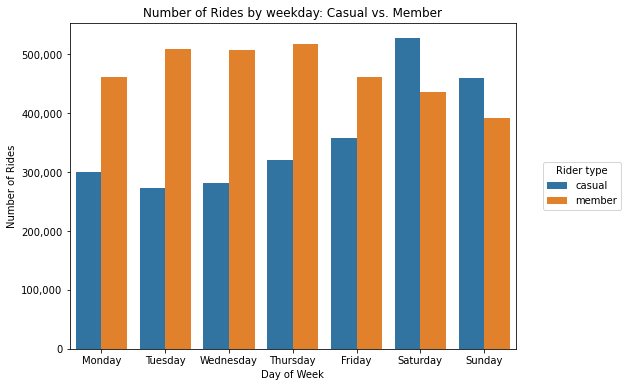

In [20]:
# visualize the number of rides by weekday
plt.figure(figsize=(8, 6))
sns.barplot(data=byweekday, x='day_of_week', y='number_of_rides', hue='member_casual')
plt.title('Number of Rides by weekday: Casual vs. Member')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')

# add thousands separator
plt.gca().get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# set location legend
plt.legend(title='Rider type', loc='center left', bbox_to_anchor=(1.05, 0.5))

There is an opposite trend in the number of rides per day of the week by members and casual riders. Casuals tend to use the services more during weekend, perhaps indicating that they prefer to use it for leisure, while members seem to use the service regularly throughout the week (slightly higher in the middle of the week), which might suggest that they are likely use bikes to commute to work each day.

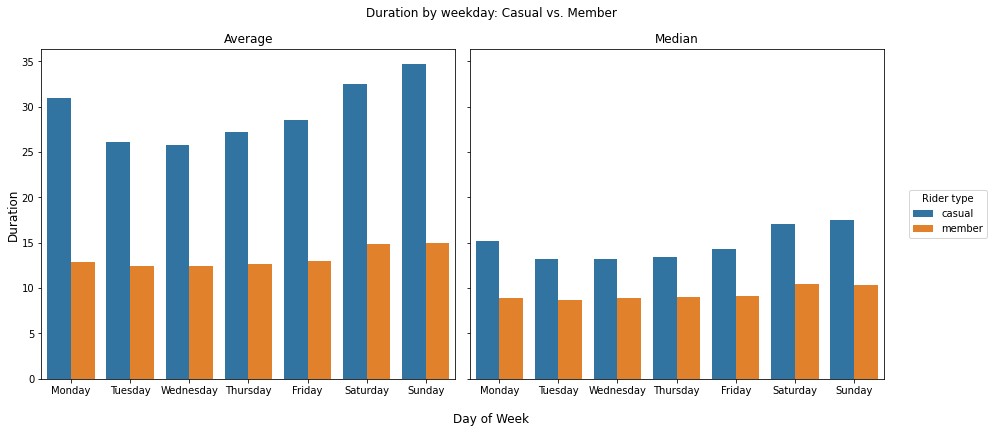

In [21]:
# visualize the ride length by weekday
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14,6), sharex=True, sharey=True)
fig.suptitle('Duration by weekday: Casual vs. Member')
fig.supxlabel('Day of Week')
fig.supylabel('Duration')

sns.barplot(ax= ax1, data=byweekday, x='day_of_week', y='avg_ride_length', hue='member_casual')
ax1.set_title('Average')
ax1.set(xlabel=None, ylabel=None)
ax1.get_legend().remove()

sns.barplot(ax= ax2, data=byweekday, x='day_of_week', y='median_ride_length', hue='member_casual')
ax2.set_title('Median')
ax2.set(xlabel=None, ylabel=None)

plt.legend(title='Rider type', loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()

Likewise, casual riders also uses the bike longer on weekend whilst members have constant rider time for the whole week.

### Compare customer types by month

In [22]:
# ride time & number of rides by month
bymonth = bike_df.groupby(['year_month', 'member_casual']).agg(
    number_of_rides=('ride_length','count'),
    avg_ride_length=('ride_length','mean'),
    median_ride_length=('ride_length','median')).reset_index()

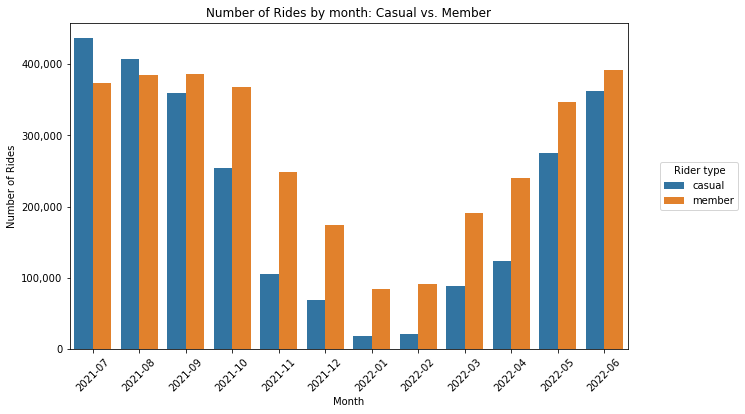

In [23]:
# visualize the number of rides by month
plt.figure(figsize=(10, 6))
sns.barplot(data=bymonth, x='year_month', y='number_of_rides', hue='member_casual')
plt.title('Number of Rides by month: Casual vs. Member')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.tick_params(axis='x', rotation=45)

# add thousands separator
plt.gca().get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# set location legend
plt.legend(title='Rider type', loc='center left', bbox_to_anchor=(1.05, 0.5))

The plot shows a strong correlation between the months and the number of rides for both rider types. This can be explained that people prefer to travel by bicycle in warm weather (July-August) than cold weather (January-February).

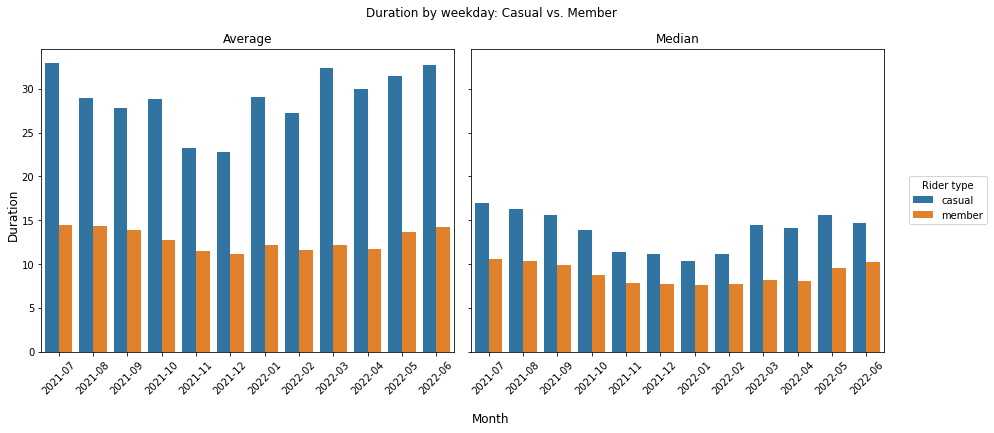

In [24]:
# visualize the average ride length by month
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14,6), sharex=True, sharey=True)
fig.suptitle('Duration by weekday: Casual vs. Member')
fig.supxlabel('Month')
fig.supylabel('Duration')

sns.barplot(ax= ax1, data=bymonth, x='year_month', y='avg_ride_length', hue='member_casual')
ax1.set_title('Average')
ax1.set(xlabel=None, ylabel=None)
ax1.tick_params(axis='x', rotation=45)
ax1.get_legend().remove()

sns.barplot(ax= ax2, data=bymonth, x='year_month', y='median_ride_length', hue='member_casual')
ax2.set_title('Median')
ax2.set(xlabel=None, ylabel=None)
ax2.tick_params(axis='x', rotation=45)

plt.legend(title='Rider type', loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()

On the other hand, the ride time doesn't seem to be affected that much by the weather. Looking at the average length, some casual riders even seem to have extremely long rides during the coldest month (January-March).

### Compare customer types by time of the day

In [25]:
# number of rides by hour
byhour = bike_df.groupby(['day_type', 'hour', 'member_casual'])['ride_length'].count().reset_index().rename(columns={'ride_length': 'number_of_rides'})

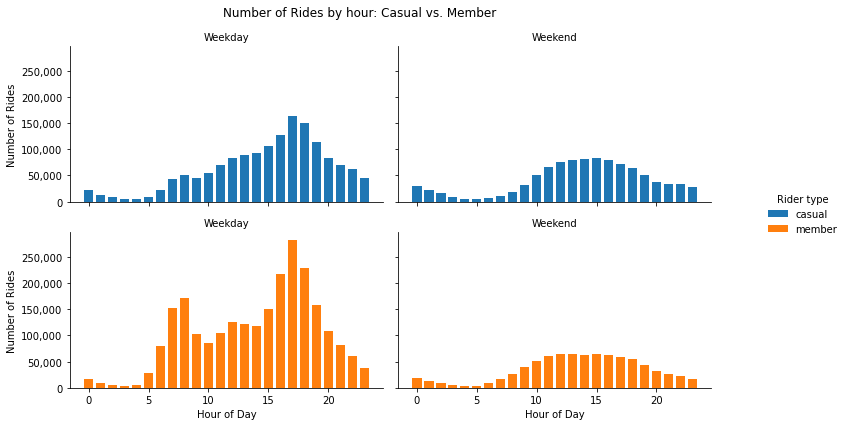

In [26]:
# visualze number of rides by hour
g = sns.FacetGrid(byhour, col='day_type', row='member_casual', hue='member_casual',height= 3, aspect=1.5)
g.map(plt.bar, "hour", "number_of_rides")
g.add_legend(title='Rider type', loc='center left', bbox_to_anchor=(1.05, 0.5))
g.set_axis_labels('Hour of Day', 'Number of Rides')
g.fig.suptitle('Number of Rides by hour: Casual vs. Member')
g.set_titles(template="{col_name}")

# add thousands separator
for ax in g.axes[:,0]:
    ax.get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

The distribution of rides by hour in weekend is relatively similar for both rider types. For weekday, there are two peak hours for members, 8AM and 5PM, which likely show that they often use the service to commute to work while for casual riders, there is only one peak at 5PM.

### Compare customer types by rideable type

In [27]:
# number of rides by rideable type
byrideable = bike_df.groupby(['rideable_type', 'member_casual'])['ride_length'].count().reset_index().rename(columns={'ride_length': 'number_of_rides'})

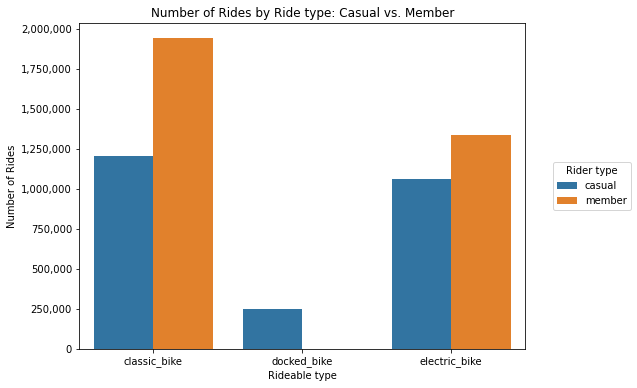

In [28]:
# visualize the number of rides by rideable type
plt.figure(figsize=(8, 6))
sns.barplot(data=byrideable, x='rideable_type', y='number_of_rides', hue='member_casual')
plt.title('Number of Rides by Ride type: Casual vs. Member')
plt.xlabel('Rideable type')
plt.ylabel('Number of Rides')

# add thousands separator
plt.gca().get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# set location legend
plt.legend(title='Rider type', loc='center left', bbox_to_anchor=(1.05, 0.5))

While classic bikes are clearly the most popular option for members, casual riders use classic bikes and electric bikes almost equally. It's also worth noting that docked bikes are the most uncommon and are used by only casuals.

## Findings and Recommendations

### Key Takeaways

* Members have more ride trips than casuals but casuals tend to take longer trips, some even up to multiple days.
* Casuals use the service significantly more during weekend while members use the service constantly throughout the week.
* Both riders enjoy cycling when the weather is warmer however some of the casuals' lengthy rides still take place during the cold months.
* Members have two peak demand hours (8AM & 5PM) during weekday while casuals only have one peak at 5PM.
* Docked bikes are the most uncommon type and are used by only casuals.

### Recommendations

Based on the above findings, here are our recommendations:
* Introduce a members-only rewards program based on trip duration to incentivize casual riders to sign up for membership. Track and notify trip cumulative totals to customers via mobile app/mail when they reach new levels/rewards.
* Offer special deals (single-ride/full-day passes) on: 
    * weekdays, especially at 8-9AM to create the habit of commuting to work; and
    * winter months (December-March) to encourage casual riders to use services in non-busy season.
* Provide special discount short-term membership package (3-6 months) to casual customers who use docked bike or who had a ride trip that longer than a specific time.

***
This is the end of the analyze step.
Go to cleaning station data step [here](./B.%20clean_station_info.ipynb) or find my Tableau dashboard [here](https://public.tableau.com/views/CyclisticBikeShare_16611333780870/Overview?:language=en-US&:display_count=n&:origin=viz_share_link).